Count Columns and rows
columns 15
rows 8955


Top Five Rows
   Unnamed: 0  enrollee_id      city  city_development_index gender  \
0           1        29725   city_40                   0.776   Male   
1           4          666  city_162                   0.767   Male   
2           7          402   city_46                   0.762   Male   
3           8        27107  city_103                   0.920   Male   
4          11        23853  city_103                   0.920   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline  experience company_size    company_type last_new_job  \
0             STEM        15.0        50

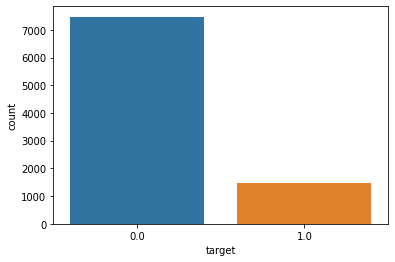

In [178]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
import sklearn.metrics as metrics
from sklearn import ensemble, tree, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


#import hrdata.csv to hrdata dataframe
hrdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hrdata2.csv")

#count columns and rows
print("Count Columns and rows")
print("columns " + str(hrdata.shape[1]))
print("rows " + str(hrdata.shape[0]) + "\n")

#top and bottom 5 rows
print("\nTop Five Rows")
print(hrdata.loc[[0,1,2,3,4]])
print("\nBottom Five Rows")
print(hrdata.iloc[[-1,-2,-3,-4,-5]])

#missing values
print("\nMissing Values Numerically")
missingValues = hrdata.isnull().sum().sort_values(ascending = False)
print(missingValues)

plt.figure()
sns.countplot(x = hrdata['target'])
plt.show()

Plot the count of target and discuss its imbalances and probable issues and solutions


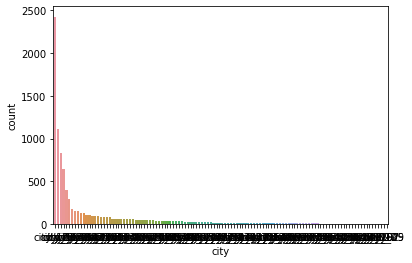

In [142]:
#records per city
plt.figure()
sns.countplot(x = hrdata['city'], order = hrdata['city'].value_counts().index)

The top four rows are
city_103 with 2426
city_21 with 1111
city_16 with 836
city_114 with 648

the remaining have 3934

   city_103  city_21  city_16  city_114
0      2426     1111      836       648


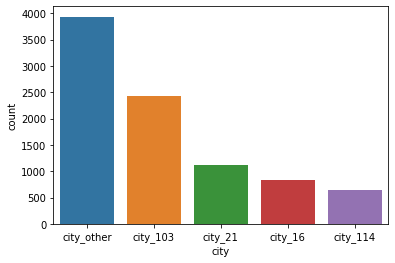

In [143]:
dOrderName = hrdata['city'].value_counts().index
dOrderValue = hrdata['city'].value_counts()
topFour = pd.DataFrame({dOrderName[0]: [dOrderValue[0]], 
           dOrderName[1]: [dOrderValue[1]], 
           dOrderName[2]: [dOrderValue[2]], 
           dOrderName[3]: [dOrderValue[3]]
           })

print(topFour)
topFour = [dOrderName[0], dOrderName[1], dOrderName[2], dOrderName[3]]

#replace city name with city_others if not within top 4
hrdata.loc[~hrdata['city'].isin(topFour), 'city'] = 'city_other'

plt.figure()
sns.countplot(x = hrdata['city'], order = hrdata['city'].value_counts().index)
plt.show()

In [144]:
#education 
print(hrdata['education_level'].value_counts().index)

def replaceEducationValue(level):
  if level == 'Graduate':
    return 0
  elif level == 'Masters':
    return 1
  elif level == 'Phd':
    return 2

updatedRow = hrdata.apply(lambda row: replaceEducationValue(row['education_level']), axis = 1)
hrdata['education_level'] = updatedRow
print(hrdata['education_level'].value_counts().index)

Index(['Graduate', 'Masters', 'Phd'], dtype='object')
Int64Index([0, 1, 2], dtype='int64')


In [145]:
#company size
print(hrdata['company_size'].value_counts().index)

def updateCompanySize(value):
  if value == '<10': 
    return 0
  elif value == '10/49': 
    return 1
  elif value == '50-99': 
    return 2
  elif value == '100-500': 
    return 3
  elif value == '500-999': 
    return 4
  elif value == '1000-4999': 
    return 5
  elif value == '5000-9999': 
    return 6
  elif value == '10000+': 
    return 7

updatedRow = hrdata.apply(lambda row: updateCompanySize(row['company_size']), axis = 1)
hrdata['company_size'] = updatedRow

print(hrdata['company_size'].value_counts().index)

Index(['50-99', '100-500', '10000+', '10/49', '1000-4999', '<10', '500-999',
       '5000-9999'],
      dtype='object')
Int64Index([2, 3, 7, 1, 5, 0, 4, 6], dtype='int64')


In [146]:
#last new job
print(hrdata['last_new_job'].value_counts().index)

def updateLastNewJob(value):
  if value == 'never': 
    return 0
  elif value == '1':
    return 1
  elif value == '2':
    return 2
  elif value == '3':
    return 3
  elif value == '4':
    return 4
  elif value == '>4':
    return 5

updatedRow = hrdata.apply(lambda row: updateLastNewJob(row['last_new_job']), axis = 1)
hrdata['last_new_job'] = updatedRow
print(hrdata['last_new_job'].value_counts().index)


Index(['1', '>4', '2', '3', '4', 'never'], dtype='object')
Int64Index([1, 5, 2, 3, 4, 0], dtype='int64')


In [147]:
#other columns
columns = ['company_type', 'major_discipline', 'enrolled_university', 'relevent_experience', 'gender', 'city']
for column in columns:
  print(hrdata[column].value_counts().index)

hrdata = pd.get_dummies(hrdata, columns = columns, prefix_sep = ': ')

#top and bottom 5 rows
pd.set_option('display.max_columns', None)
print("\nTop Five Rows")
print(hrdata.loc[[0,1,2,3,4]])
print("\nBottom Five Rows")
print(hrdata.iloc[[-1,-2,-3,-4,-5]])

print("\n shape \n {}".format(hrdata.shape))

Index(['Pvt Ltd', 'Funded Startup', 'Public Sector', 'Early Stage Startup',
       'NGO', 'Other'],
      dtype='object')
Index(['STEM', 'Humanities', 'Other', 'Business Degree', 'Arts', 'No Major'], dtype='object')
Index(['no_enrollment', 'Full time course', 'Part time course'], dtype='object')
Index(['Has relevent experience', 'No relevent experience'], dtype='object')
Index(['Male', 'Female', 'Other'], dtype='object')
Index(['city_other', 'city_103', 'city_21', 'city_16', 'city_114'], dtype='object')

Top Five Rows
   Unnamed: 0  enrollee_id  city_development_index  education_level  \
0           1        29725                   0.776                0   
1           4          666                   0.767                1   
2           7          402                   0.762                0   
3           8        27107                   0.920                0   
4          11        23853                   0.920                0   

   experience  company_size  last_new_job  traini

In [148]:
#drop enrollee_id and any duplicate columns
hrdata = hrdata.drop(columns = ['Unnamed: 0', 'enrollee_id'], axis = 1)

In [149]:
#feature scaling
scaler = MinMaxScaler()
scaler.fit(hrdata)
hrdataScaled = pd.DataFrame(scaler.transform(hrdata))

columns = list(hrdata.columns)
hrdata = pd.DataFrame(hrdataScaled)
hrdata.columns = columns
print(hrdata.head())

   city_development_index  education_level  experience  company_size  \
0                0.654691              0.0    0.714286      0.285714   
1                0.636727              0.5    1.000000      0.285714   
2                0.626747              0.0    0.619048      0.000000   
3                0.942116              0.0    0.333333      0.285714   
4                0.942116              0.0    0.238095      0.857143   

   last_new_job  training_hours  target  company_type: Early Stage Startup  \
0           1.0        0.137313     0.0                                0.0   
1           0.8        0.020896     0.0                                0.0   
2           1.0        0.050746     1.0                                0.0   
3           0.2        0.134328     1.0                                0.0   
4           0.2        0.319403     0.0                                0.0   

   company_type: Funded Startup  company_type: NGO  company_type: Other  \
0                      

In [150]:
col = hrdata.pop('target')
hrdata.insert((hrdata.shape[1]), col.name, col)
print(hrdata.head())

   city_development_index  education_level  experience  company_size  \
0                0.654691              0.0    0.714286      0.285714   
1                0.636727              0.5    1.000000      0.285714   
2                0.626747              0.0    0.619048      0.000000   
3                0.942116              0.0    0.333333      0.285714   
4                0.942116              0.0    0.238095      0.857143   

   last_new_job  training_hours  company_type: Early Stage Startup  \
0           1.0        0.137313                                0.0   
1           0.8        0.020896                                0.0   
2           1.0        0.050746                                0.0   
3           0.2        0.134328                                0.0   
4           0.2        0.319403                                0.0   

   company_type: Funded Startup  company_type: NGO  company_type: Other  \
0                           0.0                0.0                  0.0

In [151]:
#X/Y and Training/Test Split with stratified sampling and SMOTE
X = hrdata.loc[:, hrdata.columns != 'target']
y = hrdata['target']

yCounts = y.value_counts()
ratio = yCounts[1] / yCounts[0]
print("y ratio ", ratio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

yCounts = y_train.value_counts()
ratio = yCounts[1] / yCounts[0]
print("y_train ratio ", ratio)

yCounts = y_test.value_counts()
ratio = yCounts[1] / yCounts[0]
print("y_test ratio ", ratio)

X_trainBal, y_trainBal = SMOTE().fit_resample(X_train, y_train)

yCounts = y_trainBal.value_counts()
ratio = yCounts[1] / yCounts[0]
print("y_train ratio ", ratio)



y ratio  0.19847430406852248
y_train ratio  0.19847036328871892
y_test ratio  0.19848349687778769
y_train ratio  1.0


>1 0.685 (0.013)
>2 0.691 (0.012)
>3 0.691 (0.013)
>4 0.692 (0.013)
>5 0.700 (0.014)
>6 0.699 (0.013)
>7 0.701 (0.013)
>8 0.722 (0.013)
>9 0.723 (0.012)
>10 0.729 (0.011)
>11 0.730 (0.011)
>12 0.730 (0.011)
>13 0.729 (0.011)
>14 0.729 (0.011)
>15 0.731 (0.012)
>16 0.730 (0.011)
>17 0.729 (0.012)
>18 0.730 (0.012)
>19 0.729 (0.012)
>20 0.731 (0.011)
>21 0.731 (0.011)
>22 0.731 (0.011)
>23 0.731 (0.011)
>24 0.732 (0.010)
>25 0.731 (0.010)
>26 0.731 (0.010)
>27 0.731 (0.010)
>28 0.731 (0.010)
>29 0.731 (0.010)
>30 0.731 (0.010)
>31 0.731 (0.010)


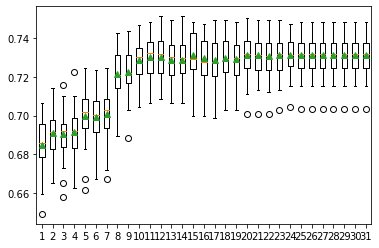

In [152]:
#PCA and Logistic Regression I
def getModels():
  models = dict()
  for i in range(1,32):
    steps = [('pca', PCA(n_components = i)), ('m', LogisticRegression())]
    models[str(i)] = Pipeline(steps=steps)
  return models

def evaluateModel(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
  scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise')
  return scores

models = getModels()
results,names = list(), list()

for name, model in models.items():
  scores = evaluateModel(model, X_trainBal, y_trainBal)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

plt.boxplot(results, labels = names, showmeans = True)
plt.show()


In [153]:
#PCA and Logistic Regression II
steps = [('pca', PCA(n_components = 20)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
model.fit(X_trainBal, y_trainBal)
y_pred = model.predict(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8008931894305917


In [154]:
#PCA Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))


confusion matrix
[[1892  350]
 [ 185  260]]

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.88      2242
         1.0       0.43      0.58      0.49       445

    accuracy                           0.80      2687
   macro avg       0.67      0.71      0.68      2687
weighted avg       0.83      0.80      0.81      2687



The confusion matrix shows the results of true negatives in C[0][0], false negatives in C[1][0], true positives in C[1][1] and false positives in C[0][1].

So there are 1892 true negatives, 350 false negatives, 185 true positives and 260 false positives

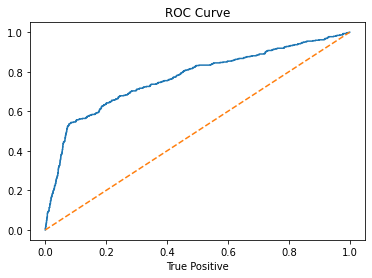


AUC Score:  0.7674498090589261


In [155]:
#PCA ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr, tpr)
print("\nAUC Score: ", auc)

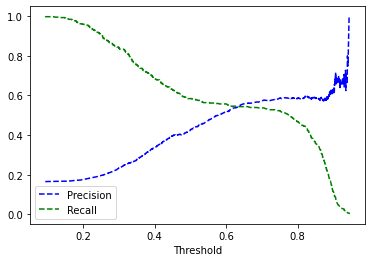

In [156]:
#PCA and Logistic Regression VI
precision, recall, thresholds = precision_recall_curve(y_test, pred)

plt.figure()
plt.plot(thresholds, precision[: -1], "b--", label = "Precision")
plt.plot(thresholds, recall[: -1], "g--", label = "Recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()

As the threshold increases precision rises and recall decreases. The two intersect near 0.6 threshold. Precision represents positive predictive value, while recall represents sensitivity

How softmax regression is related to logistic regression? What library can you use for softmax regression?

*  Both are different types of regression 
however softmax is used for multi-class problems while logistic regression is used for binary classification. The mlxtend library is used to create a softmax regression

In [157]:
#KNN unbalanced
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))
print("\nclassification report")
print(classification_report(y_test, y_pred))

#KNN balanced
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_trainBal, y_trainBal)
y_pred = KNN.predict(X_test)

print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))


confusion matrix
[[2153   89]
 [ 307  138]]

classification report
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2242
         1.0       0.61      0.31      0.41       445

    accuracy                           0.85      2687
   macro avg       0.74      0.64      0.66      2687
weighted avg       0.83      0.85      0.83      2687


confusion matrix
[[1732  510]
 [ 176  269]]

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83      2242
         1.0       0.35      0.60      0.44       445

    accuracy                           0.74      2687
   macro avg       0.63      0.69      0.64      2687
weighted avg       0.81      0.74      0.77      2687



In [158]:
#KNN GridSearch
KNNParams = {
    "n_neighbors": range(1, 20, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}
scoring = {
    "AUC": "roc_auc",
    "Accuracy": make_scorer(accuracy_score)
}

KNN = KNeighborsClassifier()
gridSearch = GridSearchCV(estimator = KNN, param_grid = KNNParams, scoring = scoring, refit = "AUC", return_train_score = True, cv = 3, n_jobs = -1)
gridResults = gridSearch.fit(X_trainBal, y_trainBal)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [159]:
#best parameters found by gridSearch
print("\nBest parameters:\n")
print(gridResults.best_params_)

#create model KNN
model = KNN.set_params(**gridResults.best_params_)
model.fit(X_trainBal, y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)


Best parameters:

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

confusion matrix
[[1803  439]
 [ 203  242]]

classification report
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      2242
         1.0       0.36      0.54      0.43       445

    accuracy                           0.76      2687
   macro avg       0.63      0.67      0.64      2687
weighted avg       0.81      0.76      0.78      2687


AUC Score:  0.7140915514839279


>1 0.665 (0.013)
>2 0.725 (0.012)
>3 0.770 (0.010)
>4 0.783 (0.012)
>5 0.794 (0.012)
>6 0.796 (0.012)
>7 0.791 (0.015)
>8 0.793 (0.012)
>9 0.804 (0.013)
>10 0.807 (0.012)
>11 0.807 (0.012)
>12 0.810 (0.011)
>13 0.812 (0.012)
>14 0.815 (0.011)
>15 0.816 (0.012)
>16 0.818 (0.011)
>17 0.817 (0.011)
>18 0.822 (0.010)
>19 0.823 (0.010)
>20 0.825 (0.009)
>21 0.824 (0.008)
>22 0.822 (0.008)
>23 0.822 (0.008)
>24 0.821 (0.008)
>25 0.821 (0.008)
>26 0.821 (0.008)
>27 0.821 (0.008)
>28 0.821 (0.008)
>29 0.821 (0.008)
>30 0.821 (0.008)
>31 0.821 (0.008)


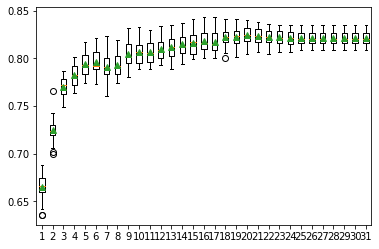

In [160]:
#KNN PCA
def getModels():
  models = dict()
  for i in range(1,32):
    steps = [('pca', PCA(n_components = i)), ('m', KNeighborsClassifier())]
    models[str(i)] = Pipeline(steps=steps)
  return models

def evaluateModel(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
  scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise')
  return scores

models = getModels()
results,names = list(), list()

for name, model in models.items():
  scores = evaluateModel(model, X_trainBal, y_trainBal)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

plt.boxplot(results, labels = names, showmeans = True)
plt.show()


In [161]:
#KNN PCA
steps = [('pca', PCA(n_components = 20)), ('m', KNeighborsClassifier())]
model = Pipeline(steps=steps)
model.fit(X_trainBal, y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report of KNN PCA
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))
print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve and AUC of ROC
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)


confusion matrix
[[1673  569]
 [ 174  271]]

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      2242
         1.0       0.32      0.61      0.42       445

    accuracy                           0.72      2687
   macro avg       0.61      0.68      0.62      2687
weighted avg       0.81      0.72      0.75      2687


AUC Score:  0.7123440146738966


KNN model with unbalanced data has decent precision and recall for 0.0 however it has a bad precision (about 61%) and a very bad recall (about 31%) for 1.0. This is because there are a many more 0.0s in the dataset than 1.0s

KNN model with balanced data has somewhat identical data, with slightly better precision but worse recall on 0.0s. It has also swapped its precision and recall on 1.0s, so its accuracy is worse but it can remember 1.0s better

KNN model with grid search and the best parameters is also somewhat similar with good scores on the 0.0s but still does poorly on the 1.0s. However the grid search allows us to find and use the best possible parameters within a given range so there is no need to guess and constantly rerun it manually.

KNN model with PCA parameters returned similar but slightly worse values than the rest however may run faster than the others since less features are used

In conclusion the best model would likely be to use the KNN model with grid search since it is able to automatically find the best parameters to use within a given range while still returning similar results to the other models. The only downside is the longer wait times so depending on the size of the datasets it may actually be better to use the knn model with either unbalanced or balanced data depending on whether you desire precision or recall concerning 1.0


confusion matrix
[[1045 1197]
 [ 104  341]]

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.47      0.62      2242
         1.0       0.22      0.77      0.34       445

    accuracy                           0.52      2687
   macro avg       0.57      0.62      0.48      2687
weighted avg       0.80      0.52      0.57      2687



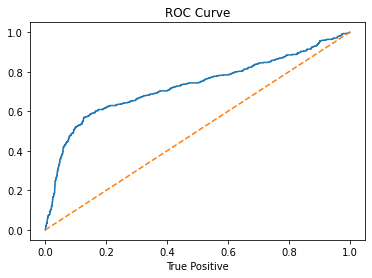


AUC Score:  0.7270053824334212

Missclassification count:
1301


In [162]:
#Naive Bayes GaussianNB
model = GaussianNB()
model.fit(X_trainBal, y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report of GaussianNB
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))
print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0])



confusion matrix
[[1919  323]
 [ 204  241]]

classification report
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      2242
         1.0       0.43      0.54      0.48       445

    accuracy                           0.80      2687
   macro avg       0.67      0.70      0.68      2687
weighted avg       0.82      0.80      0.81      2687



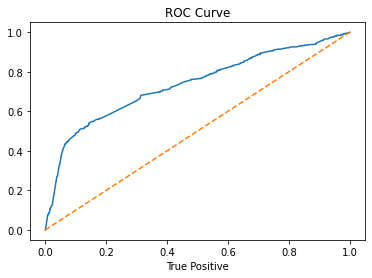


AUC Score:  0.7355661578245747

Missclassification count:
527


In [163]:
#Naive Bayes CategoricalNB
model = CategoricalNB()
model.fit(X_trainBal, y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report of CategoricalNB
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))
print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0])


In [179]:
#Support Machine Vector
#Grid search
SVCParams = {
    "C": [100, 1000],
    "gamma": [1,0.1],
    "kernel": ['rbf', 'sigmoid']
}

scoring = {
    "AUC": "roc_auc", 
    "Accuracy": make_scorer(accuracy_score)
}

SVC = SVC(probability = True, random_state = 42)
gridSearch = GridSearchCV(estimator = SVC, param_grid = SVCParams, scoring = scoring, refit = "AUC", return_train_score = True, cv = 3, n_jobs = 1)
gridResults = gridSearch.fit(X_trainBal, y_trainBal)


Best parameters:

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

confusion matrix
[[1879  363]
 [ 231  214]]

classification report
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      2242
         1.0       0.37      0.48      0.42       445

    accuracy                           0.78      2687
   macro avg       0.63      0.66      0.64      2687
weighted avg       0.80      0.78      0.79      2687



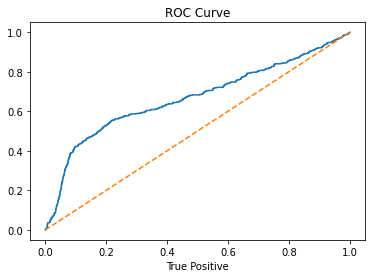


AUC Score:  0.6674808808347282

Missclassification count:
594


In [180]:
#best parameters found by gridSearch
print("\nBest parameters:\n")
print(gridResults.best_params_)

#create model SVC
model = SVC.set_params(**gridResults.best_params_)
model.fit(X_trainBal, y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0])


In [166]:
#Decision Tree unbalanced
#Grid search
DTCParams = {
    "criterion": ["entropy"],
    "max_depth": [2,3,5,10],
    "min_samples_leaf": [2,5,10],
}

scoring = {
    "AUC": "roc_auc", 
    "Accuracy": make_scorer(accuracy_score)
}

DTC = DecisionTreeClassifier()
gridSearch = GridSearchCV(estimator = DTC, param_grid = DTCParams, scoring = scoring, refit = "AUC", return_train_score = True, cv = 3, n_jobs = -1)
gridResults = gridSearch.fit(X_train, y_train)


Best parameters:

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

confusion matrix
[[2090  152]
 [ 224  221]]

classification report
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2242
         1.0       0.59      0.50      0.54       445

    accuracy                           0.86      2687
   macro avg       0.75      0.71      0.73      2687
weighted avg       0.85      0.86      0.86      2687



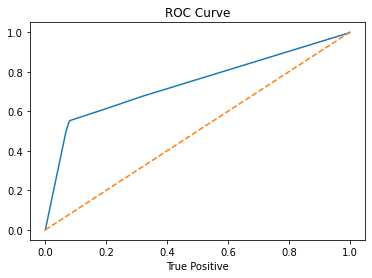


AUC Score:  0.7398620814080525

Missclassification count:
376


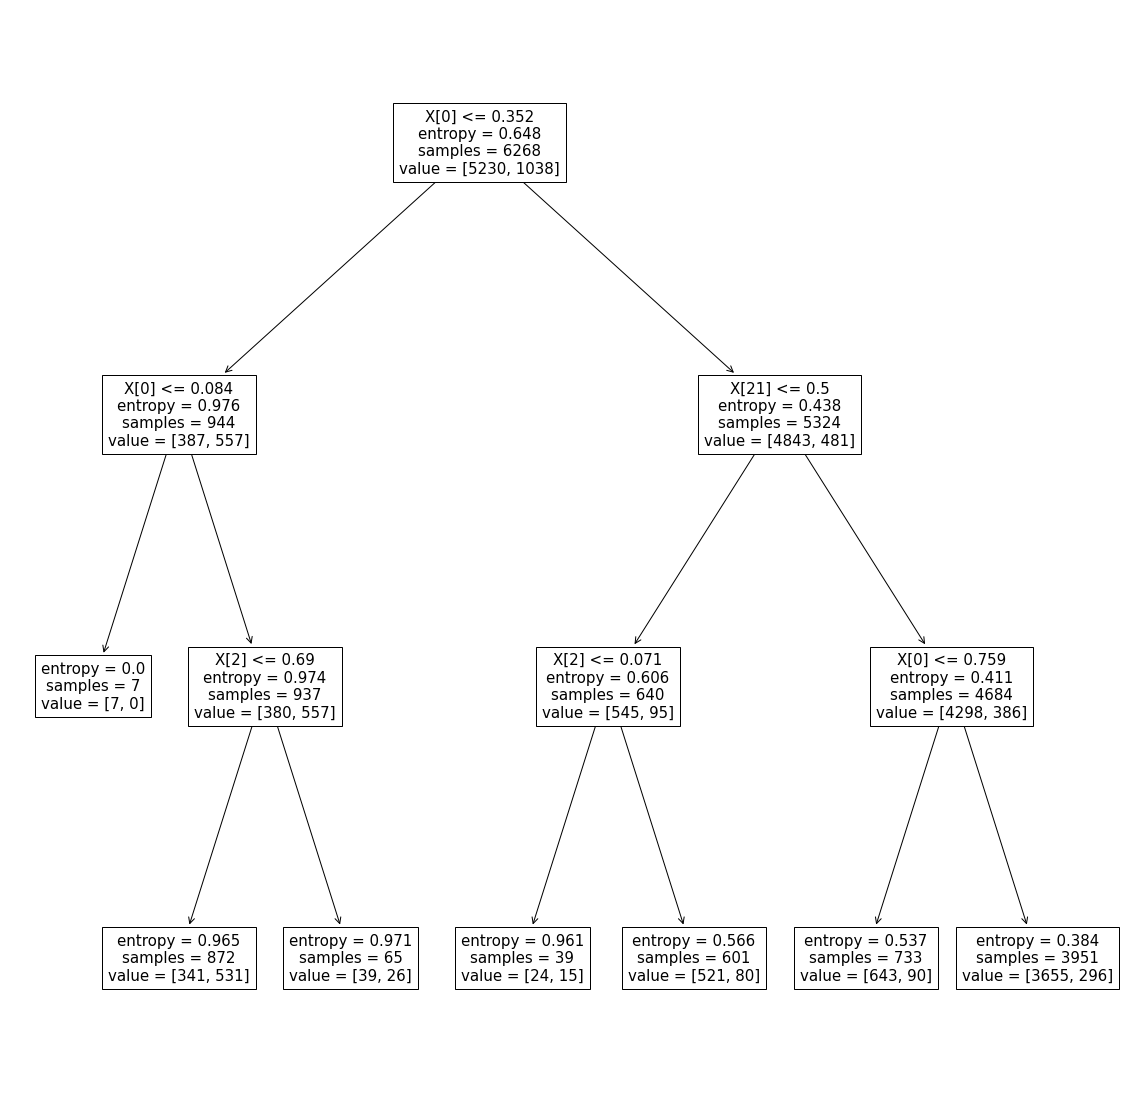

In [167]:
#best parameters found by gridSearch
print("\nBest parameters:\n")
print(gridResults.best_params_)

#create model DecisionTreeClassifier unbalanced
model = DecisionTreeClassifier(**gridResults.best_params_)   
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0])

#plot tree
plt.figure(figsize = (20,20))
tree.plot_tree(model)
plt.show()

In [168]:
#Decision Tree balanced
#Grid search
DTCParams = {
    "criterion": ["entropy"],
    "max_depth": [2,3,5,10],
    "min_samples_leaf": [2,5,10],
}

scoring = {
    "AUC": "roc_auc", 
    "Accuracy": make_scorer(accuracy_score)
}

DTC = DecisionTreeClassifier()
gridSearch = GridSearchCV(estimator = DTC, param_grid = DTCParams, scoring = scoring, refit = "AUC", return_train_score = True, cv = 3, n_jobs = -1)
gridResults = gridSearch.fit(X_trainBal, y_trainBal)


Best parameters:

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}

confusion matrix
[[1981  261]
 [ 229  216]]

classification report
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2242
         1.0       0.45      0.49      0.47       445

    accuracy                           0.82      2687
   macro avg       0.67      0.68      0.68      2687
weighted avg       0.82      0.82      0.82      2687



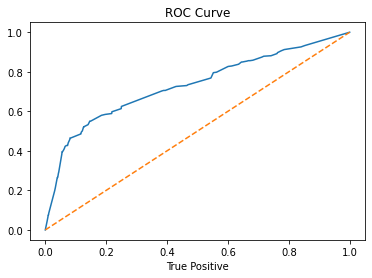


AUC Score:  0.7305661077088073

Missclassification count:
490


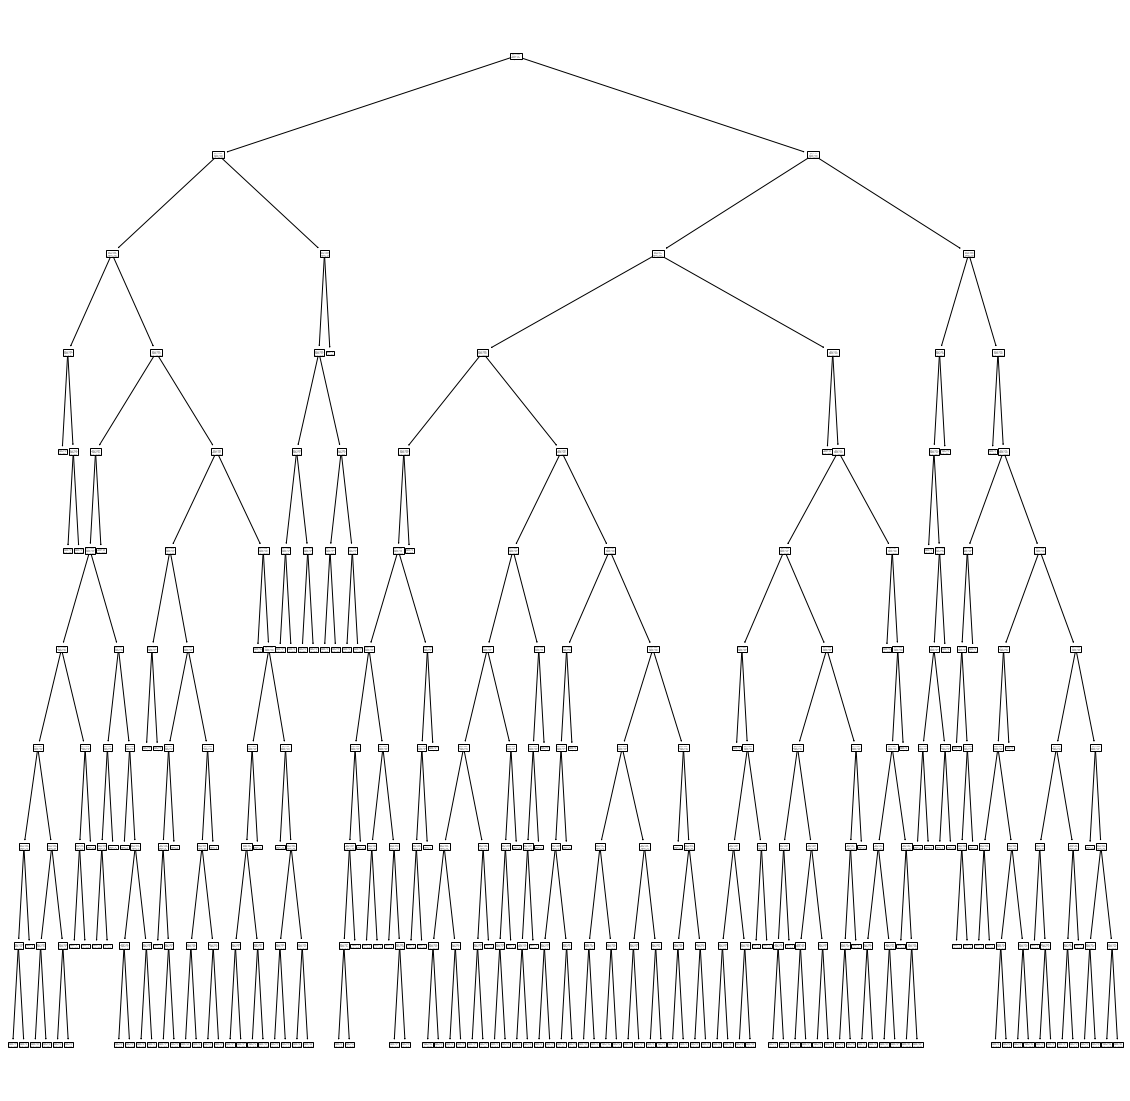

In [169]:
#best parameters found by gridSearch
print("\nBest parameters:\n")
print(gridResults.best_params_)

#create model DecisionTreeClassifier balanced
model = DecisionTreeClassifier(**gridResults.best_params_)   
model.fit(X_trainBal,y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0])

#plot tree
plt.figure(figsize = (20,20))
tree.plot_tree(model)
plt.show()

Discuss any difference and also discuss part of the tree of 9.2

Some differences include the choosen max_depth and min_sample_leaf. The unbalanced data uses a max_depth of 2 and min_sample_leaf of 5 while the balanced uses a max_depth of 10 and min_sample_leaf of 10 as its best parameters. It looks like while the unbalanced preformed better with overall higher f1 scores the balanced one may be less biased and only does worse because of the nature of this paticular dataset.

In [170]:
#Random Forest
#Grid search
RFParams = {
    "criterion": ["entropy"],
    "max_depth": [2,3,5,10],
    "min_samples_leaf": [2,5,10],
    'n_estimators': [10,25,30,50,100,200]
}

scoring = {
    "AUC": "roc_auc", 
    "Accuracy": make_scorer(accuracy_score)
}

RF = RandomForestClassifier(random_state = 42)
gridSearch = GridSearchCV(estimator = RF, param_grid = RFParams, scoring = scoring, refit = "AUC", return_train_score = True, cv = 3, n_jobs = -1)
gridResults = gridSearch.fit(X_trainBal, y_trainBal)


Best parameters:

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}

confusion matrix
[[2061  181]
 [ 204  241]]

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      2242
         1.0       0.57      0.54      0.56       445

    accuracy                           0.86      2687
   macro avg       0.74      0.73      0.74      2687
weighted avg       0.85      0.86      0.86      2687



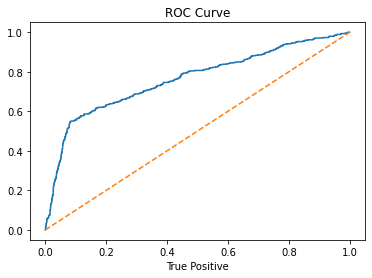


AUC Score:  0.7624377311589773

Missclassification count:
385


In [171]:
#best parameters found by gridSearch
print("\nBest parameters:\n")
print(gridResults.best_params_)

#create model RandomForestClassifier
model = RandomForestClassifier(**gridResults.best_params_)   
model.fit(X_trainBal,y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0])

In [172]:
#Boosting Algorithms AdaBoostClassifier
#Grid search
ABCParams = {
    "learning_rate": [0.05, 0.20, 0.35, 0.5, 1],
    'n_estimators': [50, 100, 200, 500]
}

scoring = {
    "AUC": "roc_auc", 
    "Accuracy": make_scorer(accuracy_score)
}

ABC = AdaBoostClassifier(random_state = 42)
gridSearch = GridSearchCV(estimator = ABC, param_grid = ABCParams, scoring = scoring, refit = "AUC", return_train_score = True, cv = 3, n_jobs = -1)
gridResults = gridSearch.fit(X_trainBal, y_trainBal)


Best parameters:

{'learning_rate': 1, 'n_estimators': 500}

confusion matrix
[[2068  174]
 [ 208  237]]

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      2242
         1.0       0.58      0.53      0.55       445

    accuracy                           0.86      2687
   macro avg       0.74      0.73      0.73      2687
weighted avg       0.85      0.86      0.86      2687



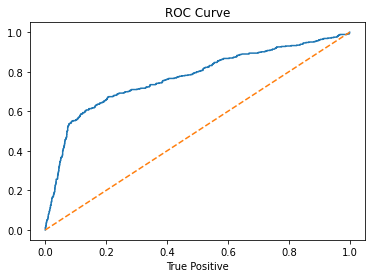


AUC Score:  0.7701821206988142

Missclassification count:
382


In [173]:
#best parameters found by gridSearch
print("\nBest parameters:\n")
print(gridResults.best_params_)

#create model AdaBoostClassifier
model = AdaBoostClassifier(**gridResults.best_params_)
model.fit(X_trainBal,y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0])

In [174]:
#Boosting Algorithms GradientBoostingClassifier
#Grid search
GBCParams = {
    "learning_rate": [0.05, 0.20, 0.35, 0.5, 1],
    'n_estimators': [50, 100, 200, 500]
}

scoring = {
    "AUC": "roc_auc", 
    "Accuracy": make_scorer(accuracy_score)
}

GBC = GradientBoostingClassifier(random_state = 42)
gridSearch = GridSearchCV(estimator = GBC, param_grid = GBCParams, scoring = scoring, refit = "AUC", return_train_score = True, cv = 3, n_jobs = -1)
gridResults = gridSearch.fit(X_trainBal, y_trainBal)


Best parameters:

{'learning_rate': 0.2, 'n_estimators': 200}

confusion matrix
[[2085  157]
 [ 237  208]]

classification report
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      2242
         1.0       0.57      0.47      0.51       445

    accuracy                           0.85      2687
   macro avg       0.73      0.70      0.71      2687
weighted avg       0.84      0.85      0.85      2687



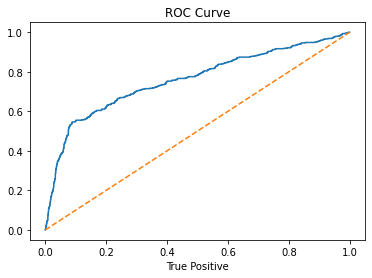


AUC Score:  0.7592067676332328

Missclassification count:
394


In [175]:
#best parameters found by gridSearch
print("\nBest parameters:\n")
print(gridResults.best_params_)

#create model GradientBoostClassifier
model = GradientBoostingClassifier(**gridResults.best_params_)
model.fit(X_trainBal,y_trainBal)
y_pred = model.predict(X_test)

#Confusion matrix and classification report
print("\nconfusion matrix")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report")
print(classification_report(y_test, y_pred))

#ROC curve
prob = model.predict_proba(X_test)
pred = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.xlabel("True Positive")
plt.show()

#AUC of ROC
auc = metrics.auc(fpr,tpr)
print("\nAUC Score: ", auc)

#Missclassification count
print("\nMissclassification count:")
print(confusion_matrix(y_test, y_pred)[0][1] + confusion_matrix(y_test, y_pred)[1][0])

It looks like for this given scenario the Random Forest model and the boosting algorithm models are the most effective as their f1-scores score the highest. I believe using the Random Forest model could work the best since it had a very slightly higher f1 score for 1.0 (0.01 difference) but they were all very similar. 

This experiment has shown me how powerful the grid search tool is. Being able to automatically test a model with a range of different parameters makes tweaking a model much faster and more efficient than doing it manually, though it may still take a while to test that model against all the parameters. It has also shown me how to utilize the confusion matrix, classification report and misclassification count, these are very powerful tools to help identify how effective your model is.